# Metrics
conda env: new `phd_v3`, old `work` (in `envs/phd`)

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


## Set variables

In [2]:
period = slice('1979','2014')
latlim, lonlim = u.get_domain_HMA()
seasons = ['Annual']

# Make a extended version for regridding properly on the edges
latlim_ext, lonlim_ext = slice(latlim.start-5, latlim.stop+5), slice(lonlim.start-5, lonlim.stop+5)

# Get zone limits for annual cycle
lonlim_HK, latlim_HK, lonlim_HM, latlim_HM, lonlim_TP, latlim_TP = u.get_zones()

# HMA for full domain and the following for the above zones
zones = ['HMA', 'HK', 'HM', 'TP']
zones_df = pd.DataFrame(
    [[lonlim, latlim], [lonlim_HK, latlim_HK], [lonlim_HM, latlim_HM], [lonlim_TP, latlim_TP]], 
    columns=pd.Index(['lonlim', 'latlim'], name='Limits'),
    index=pd.Index(zones, name='Zones')
)

## Load results

In [3]:
# mmm: multimodel mean (is at the last index)
multimodel_ensemble_bias_mmm_tas = xr.open_dataarray(
    'results/tas_'+period.start+'-'+period.stop+'multimodel_ensemble_bias_mmm.nc'
)
multimodel_ensemble_bias_mmm_snc = xr.open_dataarray(
    'results/snc_'+period.start+'-'+period.stop+'multimodel_ensemble_bias_mmm.nc'
)
multimodel_ensemble_bias_mmm_pr = xr.open_dataarray(
    'results/pr_'+period.start+'-'+period.stop+'multimodel_ensemble_bias_mmm.nc'
)

## Sorted by resolution

### tas

In [4]:
models_sortedby_tas_rmse = multimodel_ensemble_bias_mmm_tas.sel(season='Annual')[:-1].sortby(
    'rmse', ascending=True).model.values
models_sortedby_tas_rmse = np.insert(models_sortedby_tas_rmse, 0, 'Multi-Model Mean')
models_sortedby_tas_rmse

array(['Multi-Model Mean', 'CESM2', 'CESM2-WACCM', 'MPI-ESM1-2-HR',
       'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'UKESM1-0-LL',
       'MPI-ESM1-2-LR', 'TaiESM1', 'GISS-E2-1-G', 'CESM2-WACCM-FV2',
       'CESM2-FV2', 'BCC-ESM1', 'GISS-E2-1-H', 'NorESM2-LM', 'MRI-ESM2-0',
       'CAS-ESM2-0', 'BCC-CSM2-MR', 'SAM0-UNICON', 'MIROC6', 'MIROC-ES2L',
       'GFDL-CM4', 'CanESM5', 'CNRM-ESM2-1', 'CNRM-CM6-1', 'IPSL-CM6A-LR',
       'CNRM-CM6-1-HR'], dtype=object)

In [5]:
float(multimodel_ensemble_bias_mmm_tas.resolution.values[0][0:3])

1.1

In [6]:
float(multimodel_ensemble_bias_mmm_tas.resolution.values[0][5:8])

1.1

In [7]:
models_sortedby_tas_res = multimodel_ensemble_bias_mmm_tas.sel(season='Annual')[:-1].sortby(
    'rmse', ascending=True).resolution.values
models_sortedby_tas_res = np.insert(models_sortedby_tas_res, 0, '1.0°x1.0°')
models_sortedby_tas_res

array(['1.0°x1.0°', '1.2°x0.9°', '1.2°x0.9°', '0.9°x0.9°', '1.9°x1.2°',
       '0.8°x0.6°', '1.9°x1.2°', '1.9°x1.9°', '1.2°x0.9°', '2.5°x2.0°',
       '2.5°x1.9°', '2.5°x1.9°', '2.8°x2.8°', '2.5°x2.0°', '2.5°x1.9°',
       '1.1°x1.1°', '1.4°x1.4°', '1.1°x1.1°', '1.2°x0.9°', '1.4°x1.4°',
       '2.8°x2.8°', '1.2°x1.0°', '2.8°x2.8°', '1.4°x1.4°', '1.4°x1.4°',
       '2.5°x1.3°', '0.5°x0.5°'], dtype=object)

In [8]:
models_sortedby_tas_rmse

array(['Multi-Model Mean', 'CESM2', 'CESM2-WACCM', 'MPI-ESM1-2-HR',
       'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'UKESM1-0-LL',
       'MPI-ESM1-2-LR', 'TaiESM1', 'GISS-E2-1-G', 'CESM2-WACCM-FV2',
       'CESM2-FV2', 'BCC-ESM1', 'GISS-E2-1-H', 'NorESM2-LM', 'MRI-ESM2-0',
       'CAS-ESM2-0', 'BCC-CSM2-MR', 'SAM0-UNICON', 'MIROC6', 'MIROC-ES2L',
       'GFDL-CM4', 'CanESM5', 'CNRM-ESM2-1', 'CNRM-CM6-1', 'IPSL-CM6A-LR',
       'CNRM-CM6-1-HR'], dtype=object)

In [9]:
mean_res = []
models_sortedby_tas_rmse_res = []

for res, model in zip(models_sortedby_tas_res, models_sortedby_tas_rmse):
    lon = float(res[0:3])
    lat = float(res[5:8])
    mean_res.append( np.mean([lon, lat]) )
    
    models_sortedby_tas_rmse_res.append(model + ' ('+res+')')
    

In [10]:
models_sortedby_tas_rmse_res

['Multi-Model Mean (1.0°x1.0°)',
 'CESM2 (1.2°x0.9°)',
 'CESM2-WACCM (1.2°x0.9°)',
 'MPI-ESM1-2-HR (0.9°x0.9°)',
 'HadGEM3-GC31-LL (1.9°x1.2°)',
 'HadGEM3-GC31-MM (0.8°x0.6°)',
 'UKESM1-0-LL (1.9°x1.2°)',
 'MPI-ESM1-2-LR (1.9°x1.9°)',
 'TaiESM1 (1.2°x0.9°)',
 'GISS-E2-1-G (2.5°x2.0°)',
 'CESM2-WACCM-FV2 (2.5°x1.9°)',
 'CESM2-FV2 (2.5°x1.9°)',
 'BCC-ESM1 (2.8°x2.8°)',
 'GISS-E2-1-H (2.5°x2.0°)',
 'NorESM2-LM (2.5°x1.9°)',
 'MRI-ESM2-0 (1.1°x1.1°)',
 'CAS-ESM2-0 (1.4°x1.4°)',
 'BCC-CSM2-MR (1.1°x1.1°)',
 'SAM0-UNICON (1.2°x0.9°)',
 'MIROC6 (1.4°x1.4°)',
 'MIROC-ES2L (2.8°x2.8°)',
 'GFDL-CM4 (1.2°x1.0°)',
 'CanESM5 (2.8°x2.8°)',
 'CNRM-ESM2-1 (1.4°x1.4°)',
 'CNRM-CM6-1 (1.4°x1.4°)',
 'IPSL-CM6A-LR (2.5°x1.3°)',
 'CNRM-CM6-1-HR (0.5°x0.5°)']

In [11]:
# Data shape (season, model, metric)

list_data_tas = [None]*len(seasons)

for i, season in enumerate(seasons):
    data = np.ndarray(shape=(multimodel_ensemble_bias_mmm_tas.model.size, 2))

    data[:,0] = multimodel_ensemble_bias_mmm_tas.sel(season=season).reindex(model=models_sortedby_tas_rmse).rmse
    data[:,1] = multimodel_ensemble_bias_mmm_tas.sel(season=season).reindex(model=models_sortedby_tas_rmse).mean_bias

    list_data_tas[i] = pd.DataFrame(
        data, columns=pd.Index(['RMSE', 'Mean Bias'], name='Metric'),
        index=pd.Index(models_sortedby_tas_rmse_res, name='Model')
    )

# data

### snc

In [12]:
# Data shape (season, model, metric)

list_data_snc = [None]*len(seasons)

for i, season in enumerate(seasons):
    data = np.ndarray(shape=(multimodel_ensemble_bias_mmm_snc.model.size, 2))

    data[:,0] = multimodel_ensemble_bias_mmm_snc.sel(season=season).reindex(model=models_sortedby_tas_rmse).rmse
    data[:,1] = multimodel_ensemble_bias_mmm_snc.sel(season=season).reindex(model=models_sortedby_tas_rmse).mean_bias

    list_data_snc[i] = pd.DataFrame(
        data, columns=pd.Index(['RMSE', 'Mean Bias'], name='Metric'),
        index=pd.Index(models_sortedby_tas_rmse_res, name='Model')
    )

# data

### pr

In [13]:
# Data shape (season, model, metric)

list_data_pr = [None]*len(seasons)

for i, season in enumerate(seasons):
    data = np.ndarray(shape=(multimodel_ensemble_bias_mmm_pr.model.size, 2))

    data[:,0] = multimodel_ensemble_bias_mmm_pr.sel(season=season).reindex(model=models_sortedby_tas_rmse).rmse
    data[:,1] = multimodel_ensemble_bias_mmm_pr.sel(season=season).reindex(model=models_sortedby_tas_rmse).mean_bias

    list_data_pr[i] = pd.DataFrame(
        data, columns=pd.Index(['RMSE', 'Mean Bias'], name='Metric'),
        index=pd.Index(models_sortedby_tas_rmse_res, name='Model')
    )

# data

## Plot

In [14]:
list_data_vars = [
    list_data_tas, 
    list_data_snc, 
    list_data_pr
]

list_vars = ['tas', 'snc', 'pr']
ylabel_list = ['Temperature [°C]', 'Snow Cover Extent [%]', 'Total Precipitation [mm/day]']

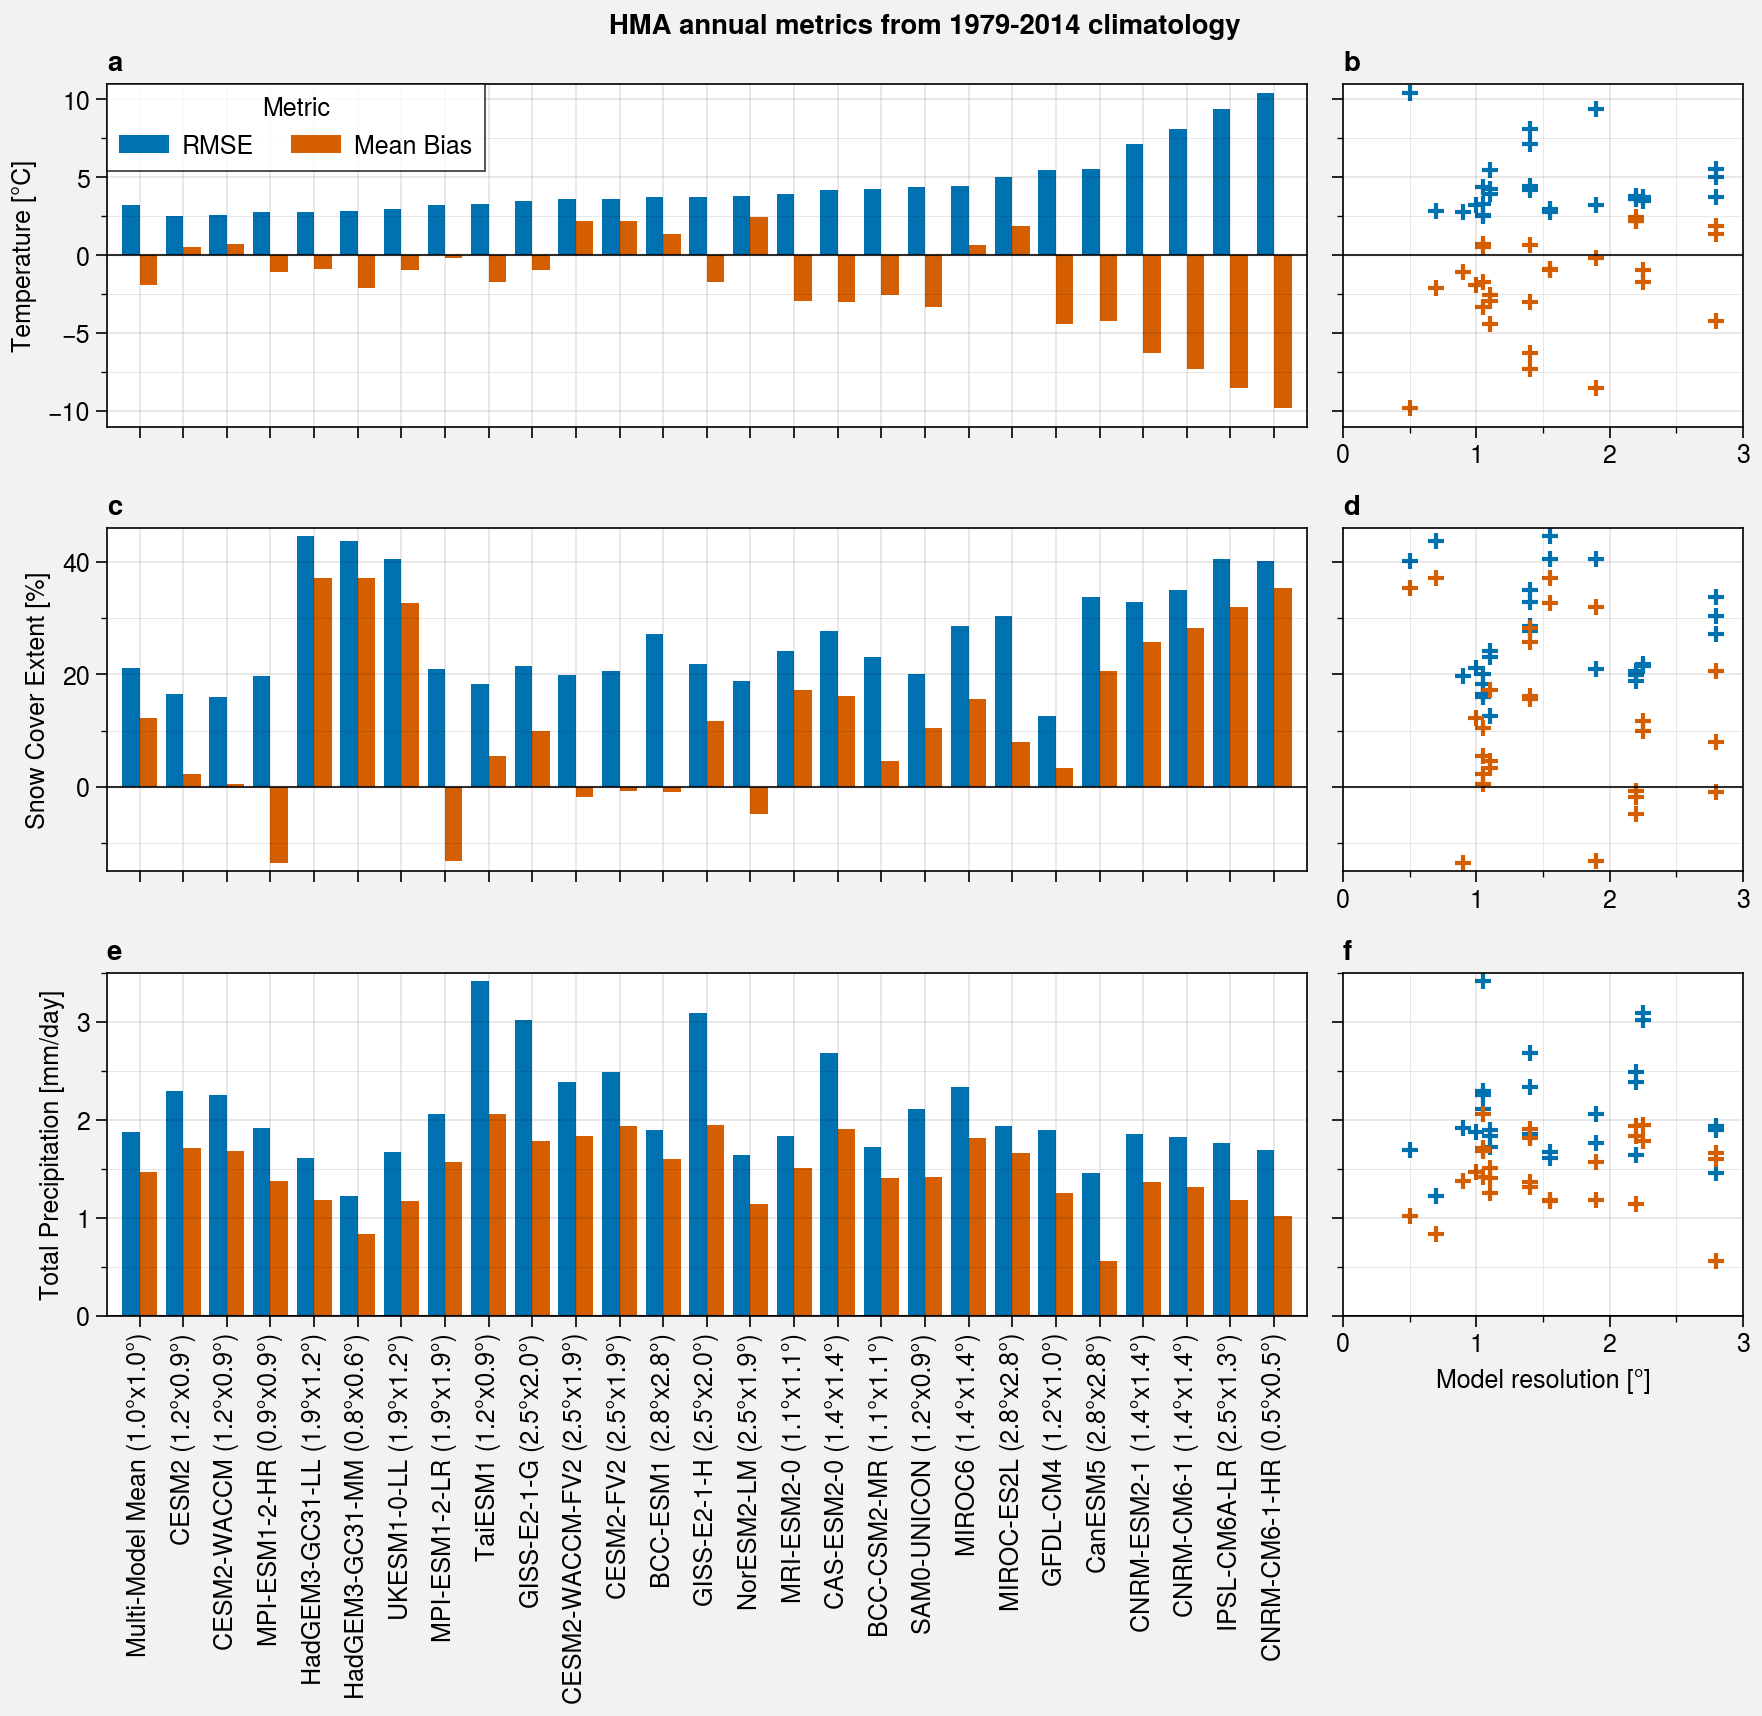

In [15]:
f, axs = plot.subplots(nrows=3, ncols=2, aspect=3.5, axwidth=6, share=0, wratios=(3, 1))

ylims = [(-11,11), (-15,46), (0,3.5)]
ylocator = [5, 20, 1.00001]
yminorlocator = [2.5, 10, 0.5]

# lim = 13.5
cycle = '538'
k = 0
for i, var in enumerate(list_vars):
    if i == 0:
        # list_data_vars[i][0] -> i: variable, 0: annual
        axs[k].bar(list_data_vars[i][0], legend='ul', linewidth=0)
    else:
        axs[k].bar(list_data_vars[i][0], linewidth=0)
        
    axs[k].plot([-0.75,26.75], [0, 0], 'k', linewidth=0.75, alpha=0.8)
    axs[k].autoscale(enable=True, axis="x", tight=True)
        
    if i == 2:
        axs[k].format(
            ylabel = ylabel_list[i], xlabel='', xrotation=90,
            ylim=ylims[i], ylocator=ylocator[i], yminorlocator=yminorlocator[i],
            ygridminor=True
        )
    else:
        axs[k].format(
            ylabel = ylabel_list[i], xlabel='', xticklabels=[],
            ylim=ylims[i], ylocator=ylocator[i], yminorlocator=yminorlocator[i],
            ygridminor=True
        )
        
    k += 1 
    
    axs[k].scatter(mean_res, list_data_vars[i][0]['RMSE'].values, marker='+')
    axs[k].scatter(mean_res, list_data_vars[i][0]['Mean Bias'].values, marker='+')
    axs[k].plot([0,3], [0, 0], 'k', linewidth=0.75, alpha=0.8)
    
    if i == 2:
        axs[k].format(
            xlabel='Model resolution [°]', xlim=(0,3), xlocator=1, xminorlocator=0.5,
            ylim=ylims[i], ylocator=ylocator[i], yminorlocator=yminorlocator[i],
            gridminor=True, yticklabels=[]
        )
    else:
        axs[k].format(
            xlabel='', xlim=(0,3), xlocator=1, xminorlocator=0.5,
            ylim=ylims[i], ylocator=ylocator[i], yminorlocator=yminorlocator[i],
            gridminor=True, yticklabels=[]
        )
    
    k += 1
    
    axs.format(
        suptitle = 'HMA annual metrics from '+period.start+'-'+period.stop+' climatology',
        abc=True
    )

    
    
filename = 'fig4_metrics_'+season+'_'+period.start+'-'+period.stop
f.save('img/'+filename+'.jpg'); f.save('img/'+filename+'.png'); f.save('img/'+filename+'.pdf')